<a href="https://colab.research.google.com/github/thiscaca000/2025_PBO_TI1A/blob/main/Jobsheet11_kb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
import os

In [3]:
base_dir = 'images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')



In [4]:
from google.colab import files
import zipfile

# Upload file zip
uploaded = files.upload()

# Ekstrak folder
with zipfile.ZipFile('images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

Saving images.zip to images.zip


In [5]:
os.listdir('images/train')

['clean', '.DS_Store', 'messy']

In [6]:
os.listdir('images/val')

['clean', 'messy']

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)



In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')



Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,529,665 (51.61 MB)

 Trainable params: 13,529,665 (51.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])



In [12]:
# latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 - 15s - 620ms/step - accuracy: 0.4500 - loss: 0.8228 - val_accuracy: 0.5000 - val_loss: 0.6870
Epoch 2/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


25/25 - 12s - 472ms/step - accuracy: 0.5109 - loss: 0.6957 - val_accuracy: 0.5500 - val_loss: 0.6912
Epoch 3/20
25/25 - 29s - 1s/step - accuracy: 0.5500 - loss: 0.6919 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 4/20
25/25 - 11s - 450ms/step - accuracy: 0.5109 - loss: 0.7001 - val_accuracy: 0.5000 - val_loss: 0.6751
Epoch 5/20
25/25 - 30s - 1s/step - accuracy: 0.5600 - loss: 0.6889 - val_accuracy: 0.7500 - val_loss: 0.6520
Epoch 6/20
25/25 - 12s - 472ms/step - accuracy: 0.6630 - loss: 0.6801 - val_accuracy: 0.5000 - val_loss: 0.7900
Epoch 7/20
25/25 - 13s - 507ms/step - accuracy: 0.5000 - loss: 0.7016 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 8/20
25/25 - 12s - 469ms/step - accuracy: 0.5217 - loss: 0.7089 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 9/20
25/25 - 29s - 1s/step - accuracy: 0.4900 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 10/20
25/25 - 12s - 470ms/step - accuracy: 0.5109 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6904
Epoch 11/20

Masukkan path gambar: images/train/clean/77.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Prediksi: clean


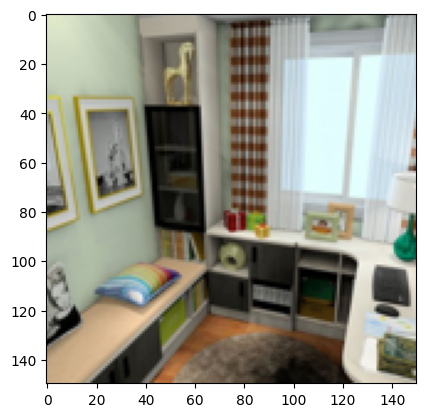

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Ensure matplotlib is set for inline display
get_ipython().run_line_magic('matplotlib', 'inline')

def predict_image_class(model, image_path):
    img = Image.open(image_path).resize((150, 150))
    imgplot = plt.imshow(img)
    x = np.expand_dims(np.array(img), axis=0)
    classes = model.predict(x, batch_size=10)

    # Return the prediction result
    return classes[0]

# Misalkan model adalah objek model yang sudah diinisialisasi sebelumnya

# Mengunggah gambar
image_path = input("Masukkan path gambar: ")
# Call the function and store the returned prediction
prediction = predict_image_class(model, image_path)

# Use the stored prediction variable
print("Prediksi:", "clean" if prediction < 0.5 else "messy")
# Remove or modify the line that uses 'label' as it is not defined
# print("Label Asli:", "clean" if label == 0 else "messy")

Masukkan path gambar: images/train/clean/25.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Prediksi: clean


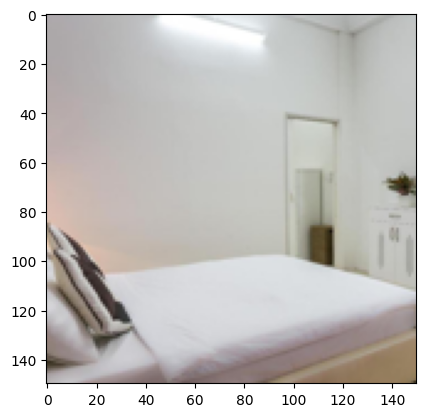

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Ensure matplotlib is set for inline display
get_ipython().run_line_magic('matplotlib', 'inline')

def predict_image_class(model, image_path):
    img = Image.open(image_path).resize((150, 150))
    imgplot = plt.imshow(img)
    x = np.expand_dims(np.array(img), axis=0)
    classes = model.predict(x, batch_size=10)

    # Return the prediction result
    return classes[0]

# Misalkan model adalah objek model yang sudah diinisialisasi sebelumnya

# Mengunggah gambar
image_path = input("Masukkan path gambar: ")
# Call the function and store the returned prediction
prediction = predict_image_class(model, image_path)

# Use the stored prediction variable
print("Prediksi:", "clean" if prediction < 0.5 else "messy")
# Remove or modify the line that uses 'label' as it is not defined
# print("Label Asli:", "clean" if label == 0 else "messy")

Masukkan path gambar: images/train/clean/90.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediksi: clean


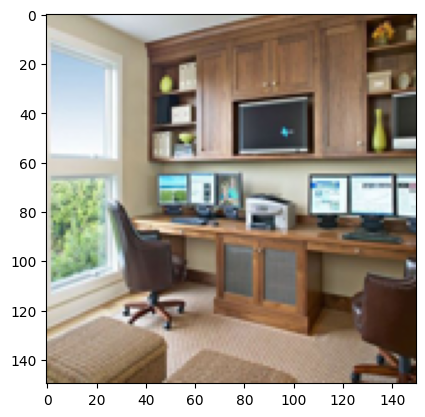

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Ensure matplotlib is set for inline display
get_ipython().run_line_magic('matplotlib', 'inline')

def predict_image_class(model, image_path):
    img = Image.open(image_path).resize((150, 150))
    imgplot = plt.imshow(img)
    x = np.expand_dims(np.array(img), axis=0)
    classes = model.predict(x, batch_size=10)

    # Return the prediction result
    return classes[0]

# Misalkan model adalah objek model yang sudah diinisialisasi sebelumnya

# Mengunggah gambar
image_path = input("Masukkan path gambar: ")
# Call the function and store the returned prediction
prediction = predict_image_class(model, image_path)

# Use the stored prediction variable
print("Prediksi:", "clean" if prediction < 0.5 else "messy")
# Remove or modify the line that uses 'label' as it is not defined
# print("Label Asli:", "clean" if label == 0 else "messy")

Masukkan path gambar: images/train/messy/80.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediksi: messy


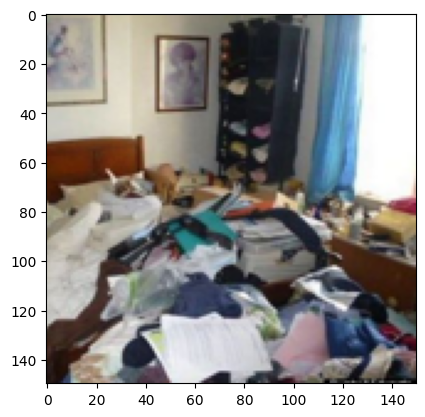

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Ensure matplotlib is set for inline display
get_ipython().run_line_magic('matplotlib', 'inline')

def predict_image_class(model, image_path):
    img = Image.open(image_path).resize((150, 150))
    imgplot = plt.imshow(img)
    x = np.expand_dims(np.array(img), axis=0)
    classes = model.predict(x, batch_size=10)

    # Return the prediction result
    return classes[0]

# Misalkan model adalah objek model yang sudah diinisialisasi sebelumnya

# Mengunggah gambar
image_path = input("Masukkan path gambar: ")
# Call the function and store the returned prediction
prediction = predict_image_class(model, image_path)

# Use the stored prediction variable
print("Prediksi:", "messy" if prediction < 0.5 else "clean")
# Remove or modify the line that uses 'label' as it is not defined
# print("Label Asli:", "clean" if label == 0 else "messy")

Masukkan path gambar: images/train/messy/12.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediksi: messy


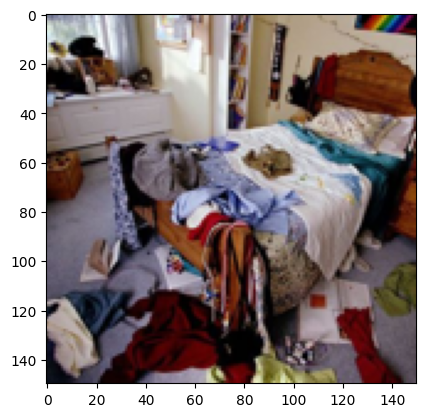

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Ensure matplotlib is set for inline display
get_ipython().run_line_magic('matplotlib', 'inline')

def predict_image_class(model, image_path):
    img = Image.open(image_path).resize((150, 150))
    imgplot = plt.imshow(img)
    x = np.expand_dims(np.array(img), axis=0)
    classes = model.predict(x, batch_size=10)

    # Return the prediction result
    return classes[0]

# Misalkan model adalah objek model yang sudah diinisialisasi sebelumnya

# Mengunggah gambar
image_path = input("Masukkan path gambar: ")
# Call the function and store the returned prediction
prediction = predict_image_class(model, image_path)

# Use the stored prediction variable
print("Prediksi:", "messy" if prediction < 0.5 else "clean")
# Remove or modify the line that uses 'label' as it is not defined
# print("Label Asli:", "clean" if label == 0 else "messy")

Masukkan path gambar: images/train/messy/76.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediksi: messy


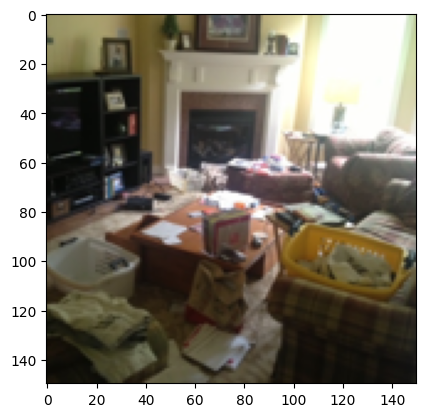

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Ensure matplotlib is set for inline display
get_ipython().run_line_magic('matplotlib', 'inline')

def predict_image_class(model, image_path):
    img = Image.open(image_path).resize((150, 150))
    imgplot = plt.imshow(img)
    x = np.expand_dims(np.array(img), axis=0)
    classes = model.predict(x, batch_size=10)

    # Return the prediction result
    return classes[0]

# Misalkan model adalah objek model yang sudah diinisialisasi sebelumnya

# Mengunggah gambar
image_path = input("Masukkan path gambar: ")
# Call the function and store the returned prediction
prediction = predict_image_class(model, image_path)

# Use the stored prediction variable
print("Prediksi:", "messy" if prediction < 0.5 else "clean")
# Remove or modify the line that uses 'label' as it is not defined
# print("Label Asli:", "clean" if label == 0 else "messy")